# Exploration

Modelling of neutrinos via decays in astrophysical sources requires some generally applicable steps. First, the relevant portions of the source environment have to be understood. This foundation is translated to energetic hadron spectra for injection and production. Finally, we obtain the neutrino spectrum from decaying the previous particles, allowing ultrahigh energy cosmic rays to propagate over large distances.

##### Importing Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import scipy.constants as const
import warnings

##### Setting Display Options

In [2]:
%config InlineBackend.figure_formats = ['svg']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['olivedrab', 'steelblue', 'firebrick', 'goldenrod'])
mpl.rcParams['figure.figsize'] = [8, 5]
mpl.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
plt.rcParams['image.cmap'] = 'magma'

## Table of Contents
* [1 Environments of Astrophysical Sources](#1-Environments-of-Astrophysical-Sources)
  * [1.1 Magnetars](#1.1-Magnetars)
  * [1.2 Active Galactic Nuclei](#1.2-Active-Galactic-Nuclei)
* [2 Hadronic Spectra in the Region of Origin](#2-Hadronic-Spectra-in-the-Region-of-Origin)
  * [2.1 Injection](#2.1-Injection)
    * [2.1.1 Magnetar](#2.1.1-Magnetar)
    * [2.1.2 Active Galactic Nucleus](#2.1.2-Active-Galactic-Nucleus)
  * [2.2 Production](#2.2-Production)
    * [2.2.1 Magnetar](#2.2.1-Magnetar)
    * [2.2.2 Active Galactic Nucleus](#2.2.2-Active-Galactic-Nucleus)
* [3 Neutrino Spectrum at the Detector](#3-Neutrino-Spectrum-at-the-Detector)
  * [3.1 Decay Processes](#3.1-Decay-Processes)
  * [3.2 Measurement](#3.2-Measurement)



## 1 Environments of Astrophysical Sources


### 1.1 Magnetars

##### Radiative Energy Losses

* $E \propto \omega^2$
* $\dot{E} \propto \omega\,\dot{\omega}$
* $\dot{\omega} \propto \omega^n$

##### Braking Index

* Pure Gravitational or Electromagnetic Quadrupoles
  * $n = 5$
* Pure Magnetic Dipole
  * $n = 3$

##### Characteristic Time Scale

* $\tau = -E_0 / \dot{E}_0$

##### Conversion of Rotational Energy into Dipole Radiation

* $E = \tfrac{1}{2} I \Omega^2$
* $\dot{E} = I \Omega\dot{\Omega} = -K\Omega^4$

##### Spindown Time
* $t_{SD} = \dfrac{I_{NS}}{2K\Omega_0^2}$

##### Time Dependence
* $\Omega = \Omega_0 \left( 1 + \tfrac{t}{t_{SD}} \right)^{-1/2}$

##### Luminosities of Tilted Dipole Rotator

* Vacuum
  * $L = \dfrac{2\mu_{NS}^2\Omega_0^4\sin^2\!\chi}{3c^3} \left( 1 + \tfrac{t}{t_{SD}} \right)^{-2}$
* Force Free
  * $L = \dfrac{\mu_{NS}^2\Omega_0^4 \left( 1 + \sin^2\!\chi \right)}{c^3} \left( 1 + \tfrac{t}{t_{SD}} \right)^{-2}$

##### Dipole Moment of a Homogeneously Magnetized Sharply Bound Sphere

* $\mu_{NS}^2 = \dfrac{B_{NS}^2R_{NS}^6}{4}$

##### Light Cylinder

* $R_{LC} = c / \Omega$

##### Charged Particle Acceleration

* Magnetic Flux
  * $\Psi = \mu_{NS}R_{LC}^{-1}$
* Potential Drop
  * $\Phi = \Psi R_{LC}^{-1}$
* Maximum Kinetic Energy
  * $E_\text{max} = e \Phi$
* Monochromatic Inefficiency Dampened Energy
  * $E_M = f_\text{acc} E_\text{max}$

##### Discrete Proton Spectrum

* Idealized Space Charge Density
  * $\rho = \dfrac{B_{NS}\,\Omega}{2\pi c}$
* Proton Number Density
  * $n_p = \rho / e$
* Polar Cap
  * $R_{PC} = R_{NS} \sqrt{\dfrac{R_{NS}}{R_{LC}}}$
* Integrating
  * $dN_p = n_p \,dx\,dy\,dz$
  * $d\dot{N}_p = n_p \,dx\,dy\tfrac{dz}{dt} = c n_p \,dx\,dy$
  * $\dot{N}_p = 2\pi c n_p R_{PC}^2 = 2\pi n_p R_{NS}^3 \Omega$
* Spectrum
  * $\dfrac{d\dot{N}_p}{dE_p} = \dfrac{B_{NS}R_{NS}^3 \Omega_0^2}{ec \left( 1 + \tfrac{t}{t_{SD}} \right)} \,\delta(E_p - E_M)$

In [3]:
def magnetic_dipole(B, R):
    return B * R**3 / 2

def inertia_moment(M, R):
    return 2 * M * R**2 / 5

def spindown_time(mu, xi, Omi, I, model):
    c = const.c
    if model == 'vac':
        K = 2 * mu**2 * np.sin(xi)**2 / (3 * c**3)
    elif model == 'ffe':
        K = mu**2 * (1 + np.sin(xi)**2) / c**3
    else:
        K = 1
    return I / (2 * K * Omi**2)

def ang_freq(t, tau, Omi):
    return Omi / np.sqrt(1 + t / tau)

def mono_energy(mu, Om, facc):
    c = const.c
    e = const.e
    return facc * e * mu * Om**2 / c**2

def proton_spec(B, R, Om):
    c = const.c
    e = const.e
    return B * R**3 * Om**2 / (e * c)

### 1.2 Active Galactic Nuclei

### 1.2 Active Galactic Nuclei

## 2 Hadronic Spectra in the Region of Origin

### 2.1 Injection

##### Singular Interaction Spectrum

* $x_E = E_h / E_p$
* $F_{pp \longrightarrow h} = E_p^{-1} \sigma_{pp}^{-1}\,\dfrac{d\sigma_{ph}}{dx_E}$

##### Convolution

* $\dfrac{dN_h}{dE_h} = \displaystyle{\int}_{E_h}^\infty dE_p \dfrac{dN_p}{dE_p} F_{pp\longrightarrow h}$

In [4]:
def prot_had_inter(Ep, sig_pp, dsig_ph):
    return 1 / (Ep * sig_pp) * dsig_ph

def hadron_spec(p_spec, p_h_inter):
    return p_spec * p_h_inter

#### 2.1.1 Magnetar

##### Toy Air Model

* $\sigma_{pA} = a - b \ln(E) + c \ln^2(E)$

* $\dfrac{d\sigma_{ph}}{dx_E} = \sigma_{pA} (1 + n)(1 − x_E)^n$

##### Toy Scaling Correction

* $K = \dfrac{d\sigma_\text{LO} / dx_E}{d\sigma_\text{NLO} / dx_E}
     = a + b \ln\left( \ln(E) \right) + \left(c + dE^{-e} - f \ln(E)\right)\,x_E^{3/2}$

In [5]:
def prot_air_cross_sec(Ep):
    a = 280
    b = 8.7
    c = 1.14
    return a - b * np.log(Ep) + c * np.log(Ep)**2

def prot_had_diff_cross_sec(Ep, Eh, sig_pA):
    xE = Eh / Ep
    a = 1.36
    b = 0.42
    c = 3.40
    d = 18.7
    e = 0.43
    f = 0.079
    K = a + b * np.log(np.log(Ep)) + (c + d * Ep**(-e) - f * np.log(Ep)) * xE**(3/2)
    n = 0.51
    return K * sig_pA * (1 + n) * (1 - xE)**n

##### Visualizing Parametrizations

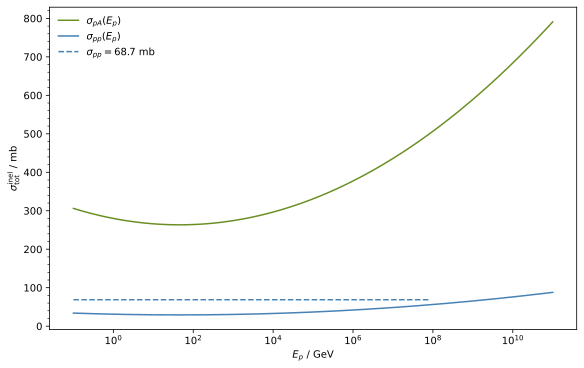

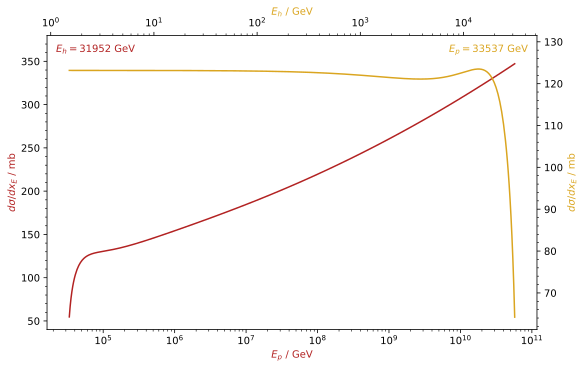

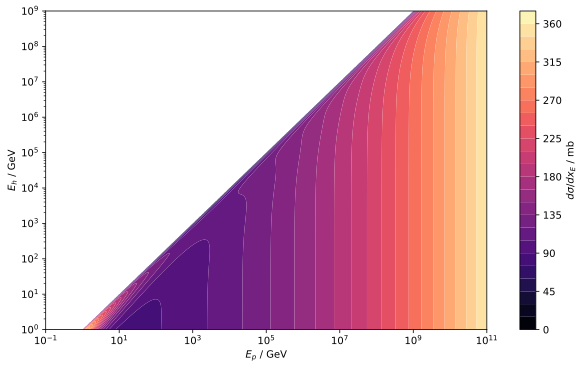

In [64]:
test_Ep = np.logspace(-1, 11, 1000)
test_Eh = np.logspace(0, 9, 1000)

test_sig_pA = prot_air_cross_sec(test_Ep)
test_sig_pp = test_sig_pA / 9

plt.plot(test_Ep, test_sig_pA, label=r'$\sigma_{pA}(E_p)$')
plt.plot(test_Ep, test_sig_pp, label=r'$\sigma_{pp}(E_p)$')
plt.plot(test_Ep[[0, -260]], [68.7, 68.7], '--', c='steelblue', label=r'$\sigma_{pp} = 68.7$ mb')

plt.xscale('log')

plt.xlabel(r'$E_p$ / GeV')
plt.ylabel(r'$\sigma_\text{tot}^\text{inel}$ / mb')
plt.legend()

plt.show()
plt.close()

test_dsig_fix_h = prot_had_diff_cross_sec(test_Ep[460:-20], test_Eh[500], test_sig_pp[460:-20])

plt.figure().add_subplot(111, label='1')

plt.plot(test_Ep[460:-20], test_dsig_fix_h, c='firebrick', label=f'$E_h = {test_Eh[500]:.0f}$ GeV')

plt.xscale('log')

plt.xlabel(r'$E_p$ / GeV', color='firebrick')
plt.ylabel(r'$d\sigma/dx_E$ / mb', color='firebrick')
for h in plt.legend(loc='upper left', labelcolor='linecolor', handlelength=0, handletextpad=0).legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.05 * plt.ylim()[1])

plt.gcf().add_subplot(111, label='2', frame_on=False)
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_right()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.set_label_position('right')

test_dsig_fix_p = prot_had_diff_cross_sec(test_Ep[460], test_Eh[20:500], test_sig_pp[460])

plt.plot(test_Eh[20:500], test_dsig_fix_p, c='goldenrod', label=f'$E_p = {test_Ep[460]:.0f}$ GeV')

plt.xscale('log')

plt.xlabel(r'$E_h$ / GeV', color='goldenrod')
plt.ylabel(r'$d\sigma/dx_E$ / mb', color='goldenrod')
for h in plt.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0).legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.04 * plt.ylim()[1])

plt.show()
plt.close()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    test_dsig_ph = prot_had_diff_cross_sec(test_Ep[None, :], test_Eh[:, None], test_sig_pp[None, :])

plt.contourf(test_Ep, test_Eh, test_dsig_ph, 33)

plt.colorbar(label=r'$d\sigma/dx_E$ / mb')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$E_p$ / GeV')
plt.ylabel(r'$E_h$ / GeV')

plt.show()
plt.close()

##### Calculating Quantities

#### 2.1.2 Active Galactic Nucleus

### 2.2 Production

#### 2.2.1 Magnetar

#### 2.2.2 Active Galactic Nucleus

## 3 Neutrino Spectrum at the Detector

### 3.1 Decay Processes

### 3.2 Measurement